In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import PIL
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import cv2
from keras.optimizers.schedules import ExponentialDecay
from keras import optimizers
import seaborn as sns
from sklearn import metrics
from keras.callbacks import EarlyStopping

In [2]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'NA_Fish_Dataset')

In [3]:
# data for model training
data = []
labels = []
for fname in os.listdir(data_dir):
    fish_dir = os.path.join(data_dir, fname)
    for fish in os.listdir(fish_dir):
        image = cv2.imread(os.path.join(fish_dir, fish))
        scaled_image = cv2.resize(image, (590,445))
        data.append(scaled_image)    #mod
        labels.append(fname)

In [4]:
np.array(data).shape

(430, 445, 590, 3)

In [5]:
# data for mean images
data2 = []
labels2 = []
for fname in os.listdir(data_dir):
    fish_dir = os.path.join(data_dir, fname)
    for fish in os.listdir(fish_dir):
        image = cv2.imread(os.path.join(fish_dir, fish), cv2.IMREAD_GRAYSCALE)
        scaled_image = cv2.resize(image, (590,445))
        data2.append(scaled_image)
        labels2.append(fname)


In [6]:
data_array = np.array(data)

In [7]:
enc = LabelEncoder()
# df.tag = enc.fit_transform(df.tag)
labels = enc.fit_transform(labels)

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

In [9]:
# Model 1
x_train, x_test, y_train, y_test = train_test_split(data_array, labels, stratify = labels, test_size = .2, random_state = 123)

In [10]:
y_train

array([5, 7, 0, 3, 3, 1, 5, 3, 1, 3, 1, 7, 6, 5, 4, 2, 4, 3, 1, 5, 1, 3,
       0, 7, 7, 0, 7, 1, 4, 3, 2, 0, 4, 5, 4, 2, 6, 4, 4, 6, 1, 2, 6, 5,
       1, 5, 7, 2, 7, 8, 5, 5, 3, 4, 6, 4, 0, 2, 7, 1, 0, 4, 2, 5, 5, 4,
       6, 6, 5, 4, 0, 2, 2, 4, 1, 5, 7, 8, 0, 1, 0, 3, 2, 5, 1, 0, 5, 6,
       0, 8, 6, 5, 0, 2, 3, 2, 2, 6, 0, 3, 0, 3, 4, 6, 2, 1, 8, 5, 1, 5,
       8, 2, 5, 3, 1, 1, 4, 1, 1, 4, 6, 1, 7, 8, 6, 4, 0, 8, 7, 7, 6, 2,
       3, 2, 0, 1, 4, 0, 2, 1, 4, 0, 2, 2, 4, 8, 4, 4, 7, 5, 6, 6, 7, 4,
       6, 6, 3, 6, 1, 6, 2, 5, 8, 1, 3, 8, 3, 7, 1, 1, 5, 7, 4, 7, 0, 4,
       1, 4, 3, 4, 8, 7, 0, 2, 8, 0, 6, 6, 0, 2, 3, 7, 5, 3, 4, 3, 5, 4,
       1, 2, 5, 4, 6, 7, 2, 3, 8, 4, 6, 4, 4, 3, 3, 1, 2, 1, 7, 4, 2, 5,
       5, 1, 3, 0, 5, 2, 3, 3, 3, 1, 7, 6, 2, 3, 7, 7, 2, 4, 5, 6, 7, 7,
       5, 0, 3, 2, 6, 7, 0, 7, 3, 6, 1, 7, 8, 6, 5, 3, 7, 6, 1, 7, 6, 3,
       6, 0, 1, 5, 6, 0, 8, 7, 2, 0, 8, 1, 4, 4, 8, 6, 0, 2, 8, 0, 7, 3,
       2, 0, 3, 7, 1, 0, 0, 6, 0, 5, 0, 1, 2, 8, 7,

In [11]:
y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [16]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode = 'nearest',
        validation_split = .20)

In [17]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=.001,
    decay_steps=200,
    decay_rate=0.9)

optimizer = optimizers.RMSprop(learning_rate = lr_schedule)
callback = EarlyStopping(monitor = 'loss', patience = 3)

In [18]:
# Model 1
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
        input_shape=(445, 590, 3), activity_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', activity_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', activity_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', activity_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))


model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
x_train = x_train / 255

In [19]:
datagen.fit(x_train)

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 443, 588, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 221, 294, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 219, 292, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 109, 146, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 107, 144, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 72, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 51, 70, 128)      

In [21]:
epochs = 70
history = model.fit(datagen.flow(x_train, y_train, subset='training'),
         validation_data=datagen.flow(x_train, y_train, subset='validation'), epochs=epochs, callbacks = [callback])

Epoch 1/70
9/9 [==============================] - 51s 6s/step - loss: 331.9664 - accuracy: 0.0942 - val_loss: 107.2683 - val_accuracy: 0.1618
Epoch 2/70
9/9 [==============================] - 50s 6s/step - loss: 66.9109 - accuracy: 0.1884 - val_loss: 30.6574 - val_accuracy: 0.2206
Epoch 3/70
9/9 [==============================] - 49s 5s/step - loss: 19.9038 - accuracy: 0.1848 - val_loss: 9.7821 - val_accuracy: 0.1912
Epoch 4/70
9/9 [==============================] - 51s 6s/step - loss: 6.6837 - accuracy: 0.1957 - val_loss: 4.2461 - val_accuracy: 0.2941
Epoch 5/70
9/9 [==============================] - 49s 5s/step - loss: 3.5472 - accuracy: 0.2355 - val_loss: 2.7695 - val_accuracy: 0.3235
Epoch 6/70
9/9 [==============================] - 49s 5s/step - loss: 2.7875 - accuracy: 0.2355 - val_loss: 2.3194 - val_accuracy: 0.3529
Epoch 7/70
9/9 [==============================] - 49s 5s/step - loss: 2.2325 - accuracy: 0.3478 - val_loss: 2.0778 - val_accuracy: 0.2941
Epoch 8/70
9/9 [===========

In [30]:
model.save('model_final.h5')

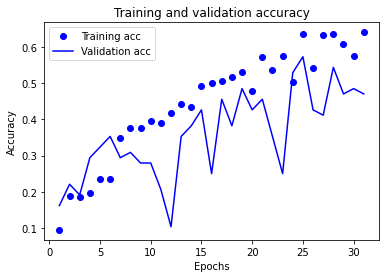

In [31]:
epoch_range = range(1, 31 + 1)
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epoch_range, acc, 'bo', label='Training acc')
plt.plot(epoch_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Model_training_graph.jpg')

In [26]:
x_test = x_test / 255

In [27]:
y_pred = model.predict_classes(x_test)

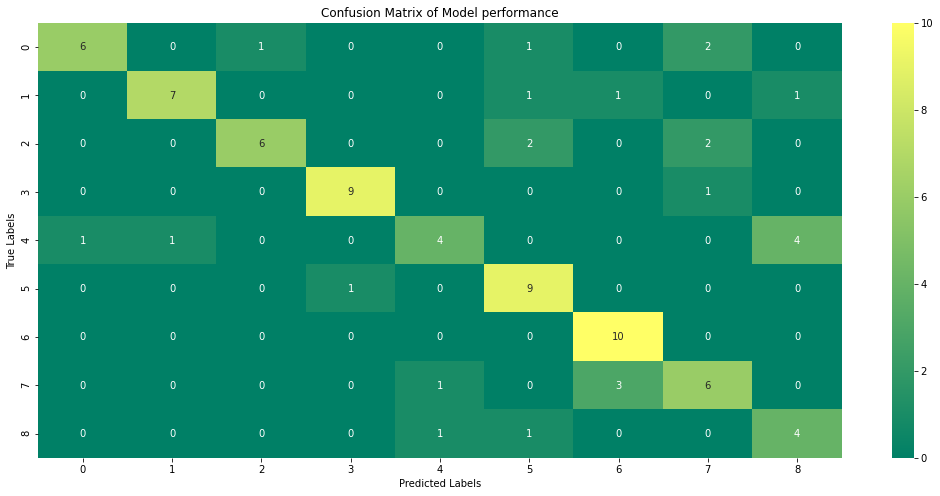

In [34]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, xticklabels = np.unique(y_test), yticklabels = np.unique(y_test), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Model performance')
plt.savefig('Model_CM.jpg')

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.7093023255813954

In [36]:
fish_types = np.unique(labels2)

In [40]:
def full_matrix(data):
    for fish in data:
        img_ts = fish
        img_ts = [img_ts.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError:
            full_mat = img_ts
            
    return full_mat


def find_mean_img(full_mat, title, size = (445, 590)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
#     return mean_img

In [38]:
bss_matrix = full_matrix(data2[:50])

In [25]:
index_start = 0
index_end = 50
full_matrix_list = []
for i in range(0, len(fish_types)):
    if index_start < 400:
        subset = full_matrix(data2[index_start:index_end])
        full_matrix_list.append(subset)
        index_start += 50
        index_end += 50
    elif index_start == 400:
        subset = full_matrix(data2[index_start:])
        full_matrix_list.append(subset)
        break

avg_img_list = tuple(zip(full_matrix_list, fish_types))

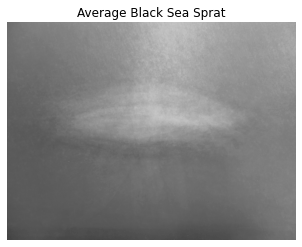

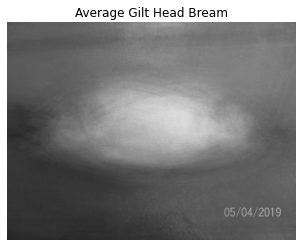

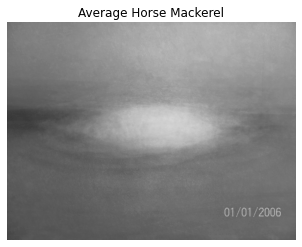

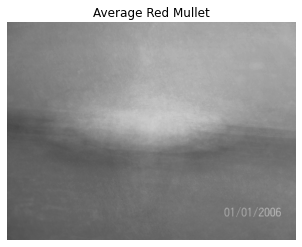

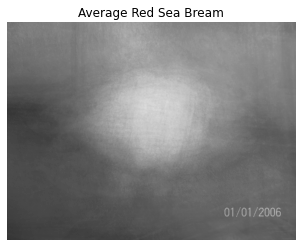

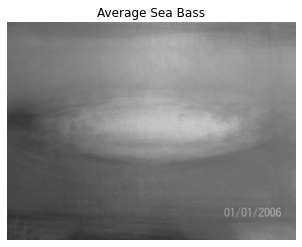

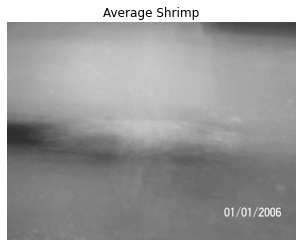

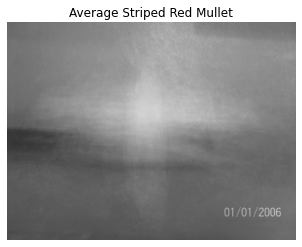

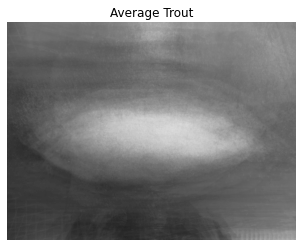

In [26]:
for group in avg_img_list:
    find_mean_img(group[0], group[1])

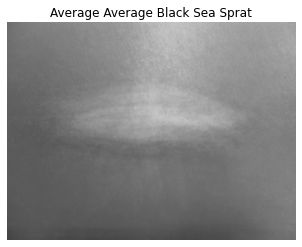

In [41]:
find_mean_img(bss_matrix, 'Average Black Sea Sprat')